# 자동차 연비 예측 모델 개발

In [59]:
!pip install ucimlrepo

In [60]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

In [61]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


# 결측치가 있는 row를 확인해서 결측치와 대조되는 컬럼의 데이터를 확인

<Axes: >

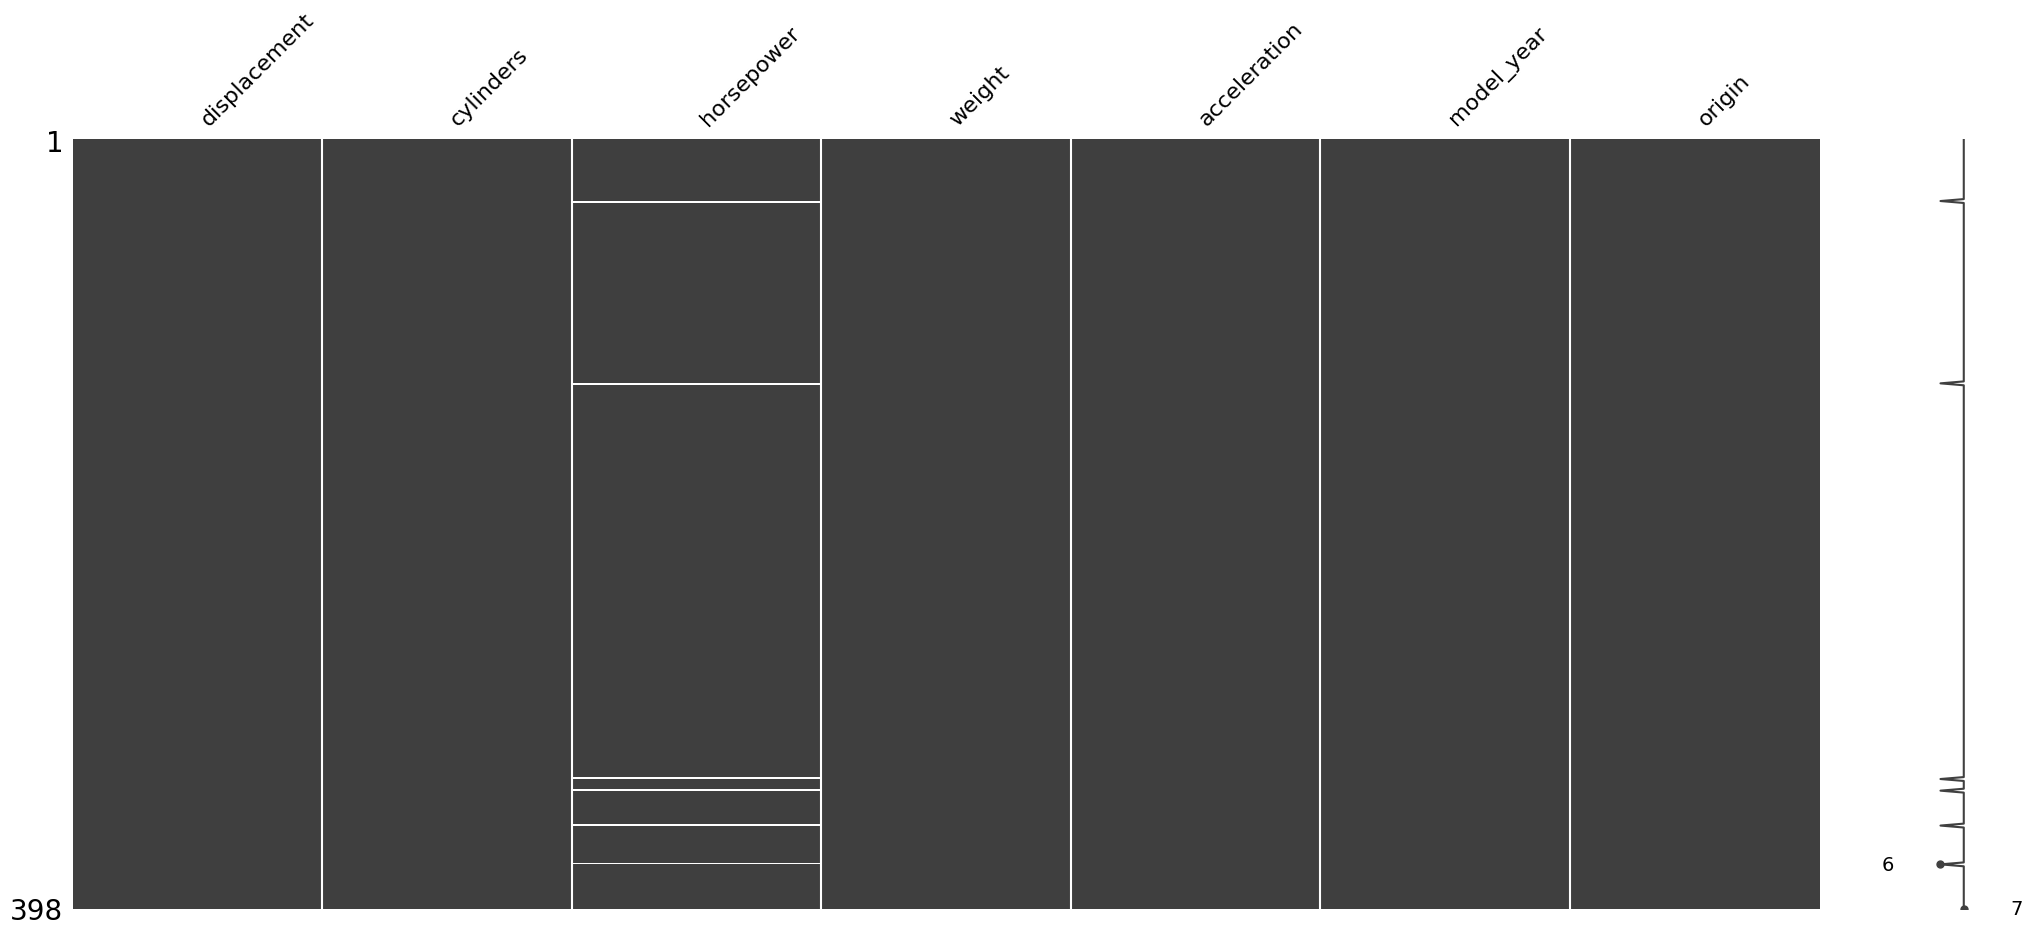

In [63]:
import missingno as msno
msno.matrix(X)

In [64]:
X[X.isna().any(axis=1)]

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
32,98.0,4,NaN,2046,19.0,71,1
126,200.0,6,NaN,2875,17.0,74,1
330,85.0,4,NaN,1835,17.3,80,2
336,140.0,4,NaN,2905,14.3,80,1
354,100.0,4,NaN,2320,15.8,81,2
374,151.0,4,NaN,3035,20.5,82,1


In [65]:
X.groupby('cylinders')['horsepower'].mean()

,horsepower
cylinders,
3,99.250000
4,78.281407
5,82.333333
6,101.506024
8,158.300971


In [66]:
# 1 결측치를 제거한다.
# X.dropna(inplace=True)

# 2.결측치를 채운다(평균)
# X.fillna(X.mean(),inplace=True)

# 3. cylinders별로 평균을 구해서 채운다
X['horsepower'] = X['horsepower'].fillna( X.groupby('cylinders')['horsepower'].transform('mean') )
# X['horsepower'] = X['horsepower'].fillna( X['horsepower'].mean() )
X.info()


# 전체 평균
# RMSE: 2.862770005444669
# R2: 0.8475731044779455

# 실린더별 평균
# RMSE: 2.8624170856130307
# R2: 0.8476106842753683

# 결측치를 채울때 데이터의 특성을 고려해서 채우면 성능이 올라간다


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


<ipython-input-66-c0208e8addcc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['horsepower'] = X['horsepower'].fillna( X.groupby('cylinders')['horsepower'].transform('mean') )


In [67]:
X.loc[126]

,126
displacement,200.000000
cylinders,6.000000
horsepower,101.506024
weight,2875.000000
acceleration,17.000000
model_year,74.000000
origin,1.000000


In [68]:
# 모델개발에 필요한 라이브러
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
# X(학습용), y(정답) 데이터 분할 되어 있고
# 데이터를 학습용과 테스트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((318, 7), (80, 7), (318, 1), (80, 1))

In [70]:
# 모델 만들고 학습하고 평가하고.. 그리고 예측
import numpy as np
lr = LinearRegression()  # 모델
lr.fit(X_train, y_train) # 학습
y_pred = lr.predict(X_test) # 예측
rmse = np.sqrt(mean_squared_error(y_test, y_pred) ) # 평가
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R2:", r2)

RMSE: 2.8624170856130307
R2: 0.8476106842753683


# 회귀계수(coef_) 와 절편(intercept_)

In [71]:
lr.coef_, lr.intercept_

(array([[ 0.01447742, -0.15894993, -0.01477231, -0.00671369,  0.06174992,
          0.79306806,  1.33551873]]),
 array([-20.3002024]))

In [87]:
import pandas as pd
pd.Series(lr.coef_[0], index=X.columns,name='coef').sort_values(ascending=False)

,coef
origin,1.335519
model_year,0.793068
acceleration,0.061750
displacement,0.014477
weight,-0.006714
horsepower,-0.014772
cylinders,-0.158950


# 각 변수와 정답간의 선형성을 시각화  sns.regplot을 이용

<ipython-input-90-7d204bfffb0d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mpg'] = y


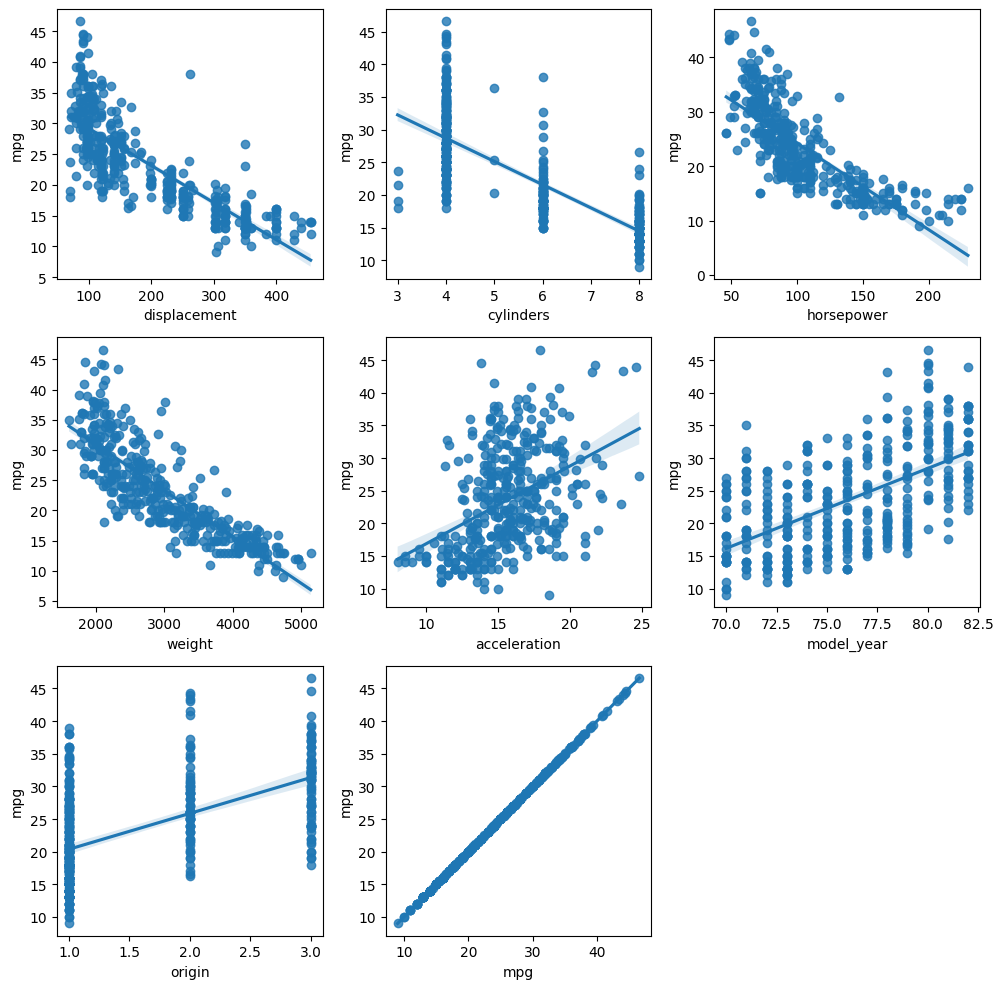

In [90]:
# 3 x 3
import matplotlib.pyplot as plt
import seaborn as sns

# sns 데이터프레임으로 처리한다
X['mpg'] = y
plt.figure(figsize=(10,10))
for idx, col in enumerate(X.columns):
  plt.subplot(3,3,idx+1)
  sns.regplot(x=col, y='mpg', data=X)

plt.tight_layout()
plt.show()

# 모델 재 설계
  - 계수가 높은 데이터
  - 선형모델에 맞게 상관계수가 높은 데이터

In [91]:
# 1. origin, model_year
# 2. weight, displacement, hoursepower

In [94]:
X1 = X.loc[:,['origin','model_year']]
X2 = X.loc[:,['weight','displacement','horsepower']]

In [95]:
x1_train,x1_test,y1_train,y1_test = train_test_split(X1,y, test_size=0.2, random_state=42)
x2_train,x2_test,y2_train,y2_test = train_test_split(X2,y, test_size=0.2, random_state=42)

In [99]:
lr1 = LinearRegression()
lr1.fit(x1_train, y1_train)
y1_pred = lr1.predict(x1_test)
rmse1 = np.sqrt(mean_squared_error(y1_test, y1_pred) )
r2_1 = r2_score(y1_test, y1_pred)
print("RMSE:", rmse1)
print("r2 score :",r2_1)

RMSE: 4.881866268630342
r2 score : 0.5567380581165788


In [100]:
lr2 = LinearRegression()
lr2.fit(x2_train, y2_train)
y2_pred = lr2.predict(x2_test)
rmse2 = np.sqrt(mean_squared_error(y2_test, y2_pred) )
r2_2 = r2_score(y2_test, y2_pred)
print("RMSE:", rmse2)
print("r2 score :",r2_2)

RMSE: 3.8387724643302525
r2 score : 0.7259224712458288


In [101]:
X.columns

Index(['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin', 'mpg'],
      dtype='object')

In [106]:
# 사용자가 데이터를 입력해서 연비를 예측
user_data = [10,8,130,1310,1200,80,1]
lr.predict([user_data])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[106.73851279]])

https://archive.ics.uci.edu/dataset/320/student+performance

In [108]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

X.shape, y.shape


((649, 30), (649, 3))

In [109]:
# 학생의 성적인 G1 G2 G3 성적을 예측하는 모델을 3개만들어서 사용  -> 정석
# 다중선형 타겟모델

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13
...,...,...,...
644,10,11,10
645,15,15,16
646,11,12,9
647,10,10,10


In [110]:
# 1. 데이터 확인(결측치) - 처리 - 데이터 분리 - 모델선정 - 학습 - 예측 - 평가  g1, g2, g3 모델에 대해서

In [115]:
# 1. 수치형 데이터만 추출
number_feature_cols = X.describe().columns
number_feature_cols

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'],
      dtype='object')

In [117]:
number_X = X[number_feature_cols]
number_X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,18,4,4,2,2,0,4,3,4,1,1,3,4
1,17,1,1,1,2,0,5,3,3,1,1,3,2
2,15,1,1,1,2,0,4,3,2,2,3,3,6
3,15,4,2,1,3,0,3,2,2,1,1,5,0
4,16,3,3,1,2,0,4,3,2,1,2,5,0


In [120]:
g1_y = y['G1']

In [121]:
x_train,x_test,y_train,y_test = train_test_split(number_X,g1_y, test_size=0.2, random_state=42)
lr_g1 = LinearRegression()
lr_g1.fit(x_train, y_train)
y_pred = lr_g1.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred) )
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("r2 score :",r2)

RMSE: 2.758705471228744
r2 score : 0.11347736199967495


In [122]:
g2_y = y['G2']
x_train,x_test,y_train,y_test = train_test_split(number_X,g2_y, test_size=0.2, random_state=42)
lr_g2 = LinearRegression()
lr_g2.fit(x_train, y_train)
y_pred = lr_g2.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred) )
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("r2 score :",r2)

RMSE: 2.840972230122502
r2 score : 0.10318494708388048


In [123]:
g3_y = y['G3']
x_train,x_test,y_train,y_test = train_test_split(number_X,g3_y, test_size=0.2, random_state=42)
lr_g3 = LinearRegression()
lr_g3.fit(x_train, y_train)
y_pred = lr_g3.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred) )
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("r2 score :",r2)

RMSE: 2.836625325606644
r2 score : 0.17486899152900603


In [130]:
# 회귀계수와 절편을 구하고.  회귀계수를 정렬
# 변수와 정답간의 시각화
print(lr_g1.coef_, lr_g1.intercept_)
print(lr_g2.coef_, lr_g2.intercept_)
print(lr_g3.coef_, lr_g3.intercept_)
s1 = pd.Series(lr_g1.coef_, index=number_X.columns,name='coef1').sort_values(ascending=False)
s2 = pd.Series(lr_g2.coef_, index=number_X.columns,name='coef2').sort_values(ascending=False)
s3 = pd.Series(lr_g3.coef_, index=number_X.columns,name='coef3').sort_values(ascending=False)
pd.DataFrame([s1,s2,s3]).T

[-0.10834904  0.3139505   0.16929063 -0.22167677  0.50702424 -1.32664417
  0.15365766  0.06185908 -0.10073099 -0.35251879  0.02413725 -0.08336736
 -0.03909793] 12.02799668524319
[ 0.11388779  0.36443015  0.22649141 -0.2768657   0.44768562 -1.56096529
  0.25615197 -0.02633898 -0.17526463 -0.38334787  0.02281604 -0.16122783
 -0.03552987] 8.937892341826101
[ 0.09873917  0.30926995  0.25615922 -0.22100384  0.58654064 -1.76887465
  0.18915467 -0.08830502 -0.14496216 -0.49575149  0.04038298 -0.18326997
 -0.01217683] 9.77861179014078


,coef1,coef2,coef3
studytime,0.507024,0.447686,0.586541
Medu,0.313950,0.364430,0.309270
Fedu,0.169291,0.226491,0.256159
famrel,0.153658,0.256152,0.189155
freetime,0.061859,-0.026339,-0.088305
Walc,0.024137,0.022816,0.040383
absences,-0.039098,-0.035530,-0.012177
health,-0.083367,-0.161228,-0.183270
goout,-0.100731,-0.175265,-0.144962
age,-0.108349,0.113888,0.098739


<ipython-input-138-56021eafc082>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  number_X['G1'] = y['G1']


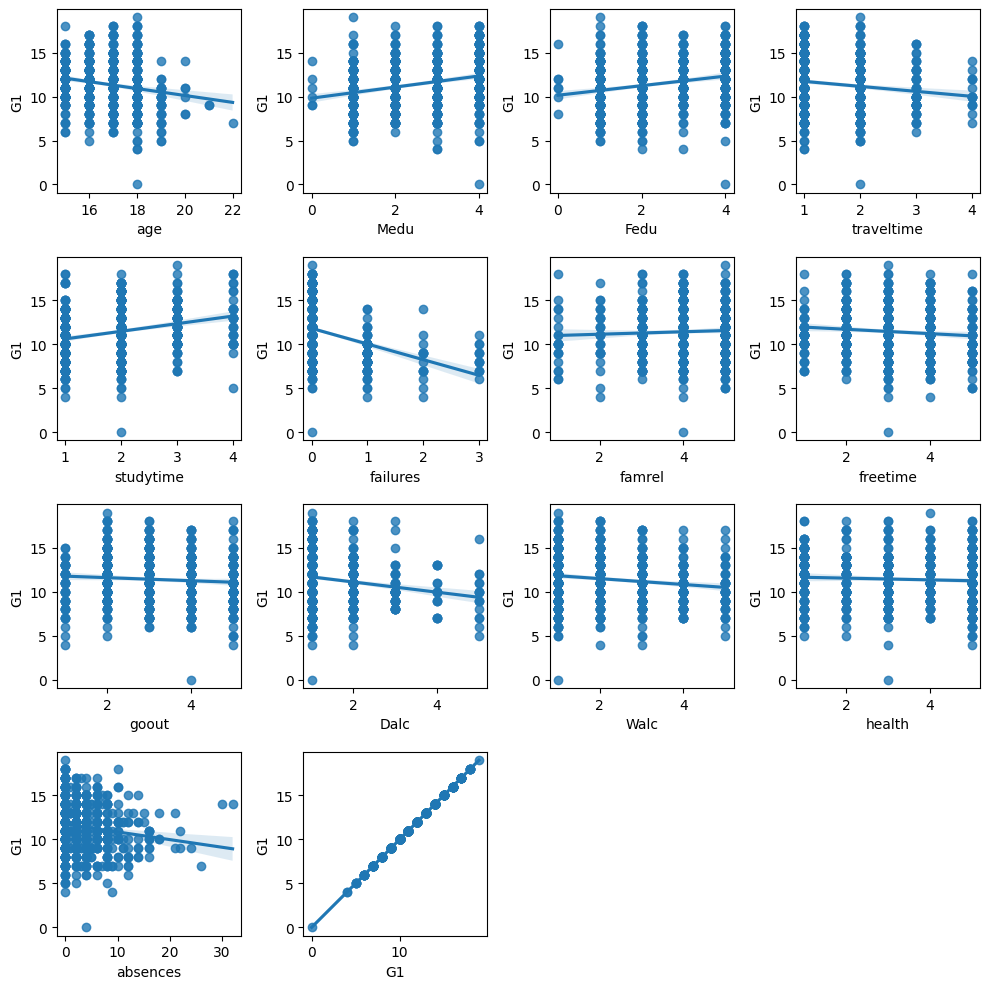

In [138]:
# 각 변수와 정답간의 시각화   4 4
number_X['G1'] = y['G1']
plt.figure(figsize=(10,10))
for idx , cols in enumerate( number_X.columns ):
  plt.subplot(4,4,idx+1)
  plt.tight_layout()
  sns.regplot(x=cols, y='G1', data=number_X)
plt.show()

In [136]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,yes,no,5,4,2,1,2,5,4
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,yes,no,4,3,4,1,1,1,4
646,MS,F,18,U,GT3,T,1,1,other,other,...,yes,no,no,1,1,1,1,1,5,6
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,6


# 다중 출력 회귀모델

In [139]:
from sklearn.multioutput import MultiOutputRegressor

In [141]:
number_X.drop(columns=['G1'],inplace=True)

<ipython-input-141-857db9069e0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  number_X.drop(columns=['G1'],inplace=True)


In [142]:
number_X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,18,4,4,2,2,0,4,3,4,1,1,3,4
1,17,1,1,1,2,0,5,3,3,1,1,3,2
2,15,1,1,1,2,0,4,3,2,2,3,3,6
3,15,4,2,1,3,0,3,2,2,1,1,5,0
4,16,3,3,1,2,0,4,3,2,1,2,5,0


In [143]:
# 데이터 분류
x_train,x_test,y_train,y_test = train_test_split(number_X,y, test_size=0.2, random_state=42)

In [145]:
y_train.head()

,G1,G2,G3
332,18,18,18
29,12,11,12
302,10,11,12
286,12,12,13
554,10,11,10


In [146]:
model = MultiOutputRegressor(LinearRegression())
model.fit(x_train, y_train)

MultiOutputRegressor(estimator=LinearRegression())

In [147]:
# 예측 평가
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred) )
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("r2 score :",r2)

RMSE: 2.812355023059715
r2 score : 0.13051043353752048


In [151]:
y_pred[:3], y_test[:3]

(array([[12.40572123, 13.22812492, 13.83124951],
        [11.32019718, 11.16884275, 11.50482228],
        [12.49031478, 13.2635228 , 13.71734447]]),
      G1  G2  G3
 636  17  18  19
 220  11  11  12
 594  18  18  18)

# R2 값이 낮은이유
  - 선형성이 부족
    - 선형관계가 없을때.. --> 비 선형모델, 신경망
  - 중요한 피처 누락
    - 피처 엔지니어링
  - 다중 공선성
     - 독립변수들은 서로 상관관계가 없어야 한다 - 상관관계가 높은 피처를 제거하거나 정규화를 실시
  - 과적합
    - 모델이 너무복잡 하거나 불필요한 피처를 포함하고 있을때
  - 데이터 품질
    - 노이즈, 결측치,이상치

# 데이터를 더 선형적으로 만들어 보자
  - 피처변환
    - 로그변환 : 비 선형적으로 증가하거나 감소 특히 지수적으로 변환을을 보일때


In [154]:
number_X['G1'] = y['G1']

<ipython-input-154-c7fa00716f5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  number_X['G1'] = y['G1']


<Axes: xlabel='studytime', ylabel='G1'>

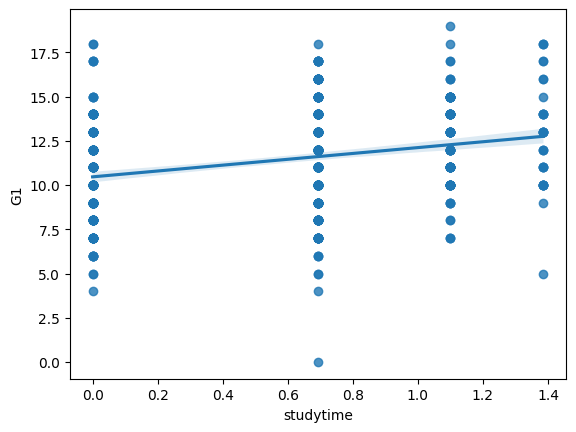

In [155]:
# 로그변환
np.log(number_X['studytime'])
sns.regplot(x=np.log(number_X['studytime']), y='G1', data=number_X)

<Axes: xlabel='absences', ylabel='G1'>

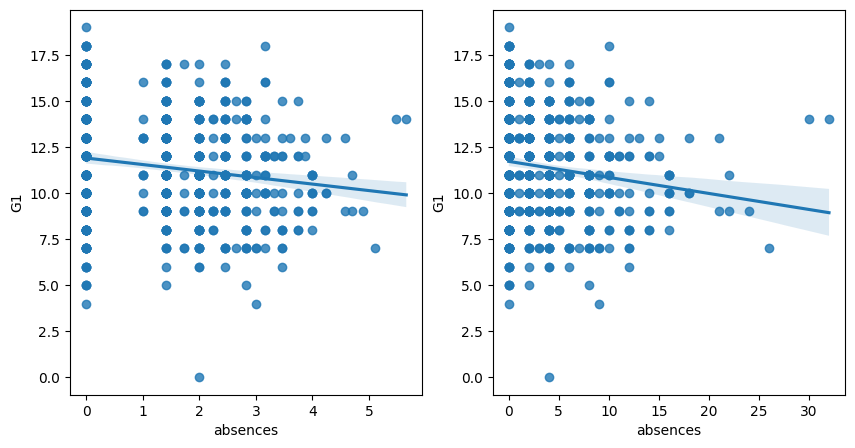

In [159]:
# 제곱근 변환 : 데이터가 한쪽으로 치워져있을때
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(x=np.sqrt(number_X['absences']), y='G1', data=number_X)
plt.subplot(1,2,2)
sns.regplot(x=number_X['absences'], y='G1', data=number_X)

<Axes: ylabel='G1'>

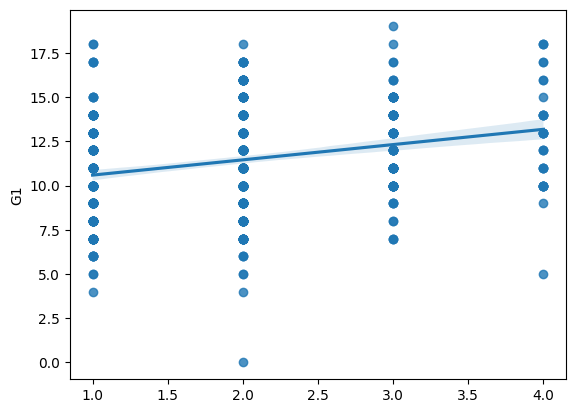

In [174]:
# 다항변환  : 제곱항을 추가
from sklearn.preprocessing import PolynomialFeatures
p = PolynomialFeatures(degree=2)
studytime_poly = p.fit_transform(number_X[['studytime']])
temp = studytime_poly[:,1]
sns.regplot(x=temp, y='G1', data=number_X)

In [176]:
number_X.drop(columns=['G1'],inplace=True)

<ipython-input-176-857db9069e0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  number_X.drop(columns=['G1'],inplace=True)


In [179]:
number_X_poly = PolynomialFeatures(degree=2).fit_transform(number_X)
mr = MultiOutputRegressor(LinearRegression())
mr.fit(number_X_poly, y)
y_pred = mr.predict(number_X_poly)
# 평가
rmse = np.sqrt(mean_squared_error(y, y_pred) )
r2 = r2_score(y, y_pred)
print("RMSE:", rmse)
print("r2 score :",r2)

RMSE: 2.286840338592366
r2 score : 0.4035162445568887
